In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.dummy import DummyRegressor

In [3]:
df_train = pd.read_csv('../datasets/complete_clean_train_extra.csv')
test = pd.read_csv('../datasets/complete_clean_test_extra.csv')

In [4]:
df_train.isnull().sum().sort_values()

Id               0
Garage Yr Blt    0
Garage Type      0
Fireplaces       0
Functional       0
                ..
Exterior 2nd     0
Exterior 1st     0
Roof Matl        0
Age              0
Remodel          0
Length: 80, dtype: int64

In [5]:
df_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.649897
Garage Cars,0.647781
Total Bsmt SF,0.629303
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


From the numerical columns above, 'Id' and 'PID' are nomial data columns and need to be excluded from Sale Price prediction.

In [6]:
features = list(df_train.corr()[['SalePrice']].drop(['SalePrice','Id','PID']).index)
features

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Cond',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'P',
 'Y',
 'NoSeWa',
 'NoSewr',
 'Age',
 'Remodel']

# Part I

The goal is to run all the features through the lasso regression model, and identify the features that have an effect on SalePrice. The lasso regression helps in getting rid of the features that do not affect the SalePrice. This will help in reducing the complexity of the model, thereby, reducing the variance. 

## Model Prep

In [7]:
X = df_train[features]
y = df_train['SalePrice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Scaling Features

In [9]:
ss = StandardScaler()

In [10]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Power Transforming the y

As mentioned before, the target variable 'SalePrice' is not normally distributed, it is skewed to the right. The 'SalePrice' variable is tehere being power transformed. This will make the distribution of the variable more Gaussian. In other words, this will stabilize the variance in target variable. 

In [11]:
pt = PowerTransformer()

In [12]:
y_train_pt = pt.fit_transform(y_train.to_frame())

In [13]:
y_test_pt = pt.transform(y_test.to_frame())

## Instantiating the Model

In [14]:
l_alphas = np.logspace(-3,0,100)

In [15]:
lasso_cv = LassoCV(alphas = l_alphas)

In [16]:
alphas = np.logspace(0,5,100)

In [17]:
ridge_cv = RidgeCV(alphas = alphas, cv=5)

## Model Validation

In [18]:
cross_val_score(lasso_cv,X_train_sc,y_train_pt).mean()

/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

0.8332147268734671

In [19]:
cross_val_score(ridge_cv,X_train_sc,y_train_pt).mean()

0.8330483017663737

## Fitting the Model

In [20]:
lasso_cv.fit(X_train_sc,y_train_pt)

/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [21]:
lasso_cv.score(X_train_sc,y_train_pt)

0.8747783663532513

In [22]:
lasso_cv.score(X_test_sc,y_test_pt)

0.8755747537806812

In [23]:
ridge_cv.fit(X_train_sc,y_train_pt)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [24]:
ridge_cv.score(X_train_sc,y_train_pt)

0.8728062589564889

In [25]:
ridge_cv.score(X_test_sc,y_test_pt)

0.8710000268792369

As seen above, there is a clear dictinction in cross_val_score of Lasso and Ridge model with its train and test scores. This signifies High Variance in the model.  

In [26]:
lasso_cv.coef_

array([-0.02581353,  0.00131925,  0.03745417, -0.03030037,  0.        ,
        0.00355375,  0.04141486,  0.32668835,  0.09142276,  0.        ,
        0.07123871,  0.0032558 , -0.        , -0.        ,  0.00785016,
        0.        ,  0.03822794,  0.        , -0.        ,  0.05193404,
        0.04312678, -0.0078856 ,  0.02637546,  0.        , -0.00098932,
        0.19966148,  0.07092618,  0.00615326,  0.03944205,  0.        ,
        0.        , -0.00271124, -0.03326827,  0.03968752,  0.06895278,
        0.        ,  0.09430569,  0.        ,  0.        ,  0.02397305,
        0.00747912,  0.01773382,  0.00923918,  0.05400313, -0.04243372,
       -0.0676309 ,  0.00258251, -0.        ,  0.00762555,  0.04921125,
        0.        ,  0.        , -0.16515798,  0.        ])

In [27]:
lasso_coefs = pd.Series(lasso_cv.coef_,X_train.columns)

<AxesSubplot:xlabel=' Scaled Change in Sale Price', ylabel='Features'>

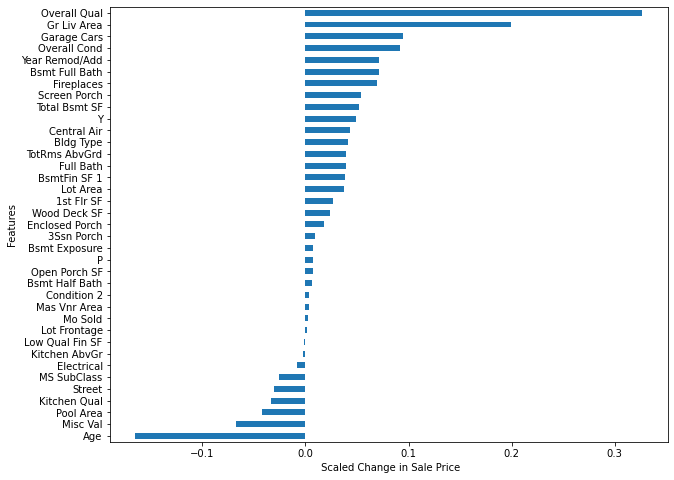

In [28]:
plt.figure(figsize=(10,8))
plt.xlabel(' Scaled Change in Sale Price')
plt.ylabel('Features')
lasso_coefs[lasso_coefs != 0].sort_values().plot.barh()

The above depicted barchart shows the columns that affect the SalePrice and that will help correctlly predict Sale Price.These features would be used to create a new model and to predict Sale Price.

# Part II

## Model Prep

In [29]:
features_from_lasso = list(lasso_coefs[lasso_coefs != 0].index)
features_from_lasso

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Condition 2',
 'Bldg Type',
 'Overall Qual',
 'Overall Cond',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Bsmt Exposure',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'P',
 'Y',
 'Age']

In [30]:
X = df_train[features_from_lasso]
y = df_train['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Scaling Features

In [32]:
ss = StandardScaler()

In [33]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Power Transforming the y

In [34]:
pt = PowerTransformer()

In [35]:
y_train_pt = pt.fit_transform(y_train.to_frame())
y_test_pt = pt.transform(y_test.to_frame())

##  Model Instantiation

In [36]:
lr = LinearRegression()

In [37]:
l_alphas = np.logspace(-3,0,100)

In [38]:
lasso_cv = LassoCV(alphas = l_alphas)

In [39]:
alphas = np.logspace(0,5,100)

In [40]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

## Model Validation

In [41]:
cross_val_score(lr, X_train_sc,y_train_pt).mean()

0.8374247890086487

In [42]:
cross_val_score(lasso_cv,X_train_sc,y_train_pt).mean()

/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

0.8354512412825572

In [43]:
cross_val_score(ridge_cv,X_train_sc,y_train_pt).mean()

0.8346236948570475

## Model Fitting

**Linear Regression**

In [44]:
lr.fit(X_train_sc,y_train_pt)

LinearRegression()

In [45]:
lr.score(X_train_sc,y_train_pt)

0.8761238690003077

In [46]:
lr.score(X_test_sc,y_test_pt)

0.8743955203765517

**Lasso Regression**

In [47]:
lasso_cv.fit(X_train_sc,y_train_pt)

/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [48]:
lasso_cv.score(X_train_sc,y_train_pt)

0.8757906263341043

In [49]:
lasso_cv.score(X_test_sc,y_test_pt)

0.8752759721742048

**Ridge Regression**

In [50]:
ridge_cv.fit(X_train_sc,y_train_pt)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [51]:
ridge_cv.score(X_train_sc,y_train_pt)

0.8734354230727875

In [52]:
ridge_cv.score(X_test_sc,y_test_pt)

0.8700247897457902

Based on the cross_val_scores alone, the Lasso Regression model has performed better on the train data. The train and the test scores are within 5% of the cross_val_score. Absence of high variance also signifies that the model is not overfit to the train data, and will be able to make predictions on unseen data. 

Compared to other models, Lasso regression model fits the data best, and will be used for predicion. 

In [53]:
lasso_pred = lasso_cv.predict(X_test_sc)

In [54]:
lasso_pred_inverse = pt.inverse_transform(lasso_pred.reshape(-1,1))

In [55]:
residuals = y_test.values - pd.Series(list(lasso_pred_inverse)).map(lambda x: x[0]).values
residuals

array([ 7.23959389e+03,  4.54714927e+03, -1.82291321e+04,  1.13487616e+04,
        4.09916863e+03,  5.55588904e+04, -1.70357367e+04,  6.00678937e+04,
       -1.51390964e+03,  9.13720959e+03, -4.33554549e+03,  2.65353401e+04,
        2.28986811e+01, -3.94637899e+03, -1.74338669e+04, -7.43645467e+02,
       -1.33248943e+04,  1.64482327e+04,  9.11902903e+03, -1.08126119e+04,
       -8.89701978e+03,  1.35652243e+04,  2.50715388e+03,  2.04468545e+04,
       -8.33996686e+02,  2.72633382e+04, -6.33211549e+03,  1.41461000e+04,
        1.92031075e+04,  1.06816663e+04,  2.50995009e+04, -6.33689665e+02,
       -3.31269523e+02, -1.43263314e+04, -8.41026723e+03, -7.81194954e+03,
       -3.69780965e+04, -1.49263540e+04,  1.29857235e+05, -3.25168653e+03,
       -7.71898545e+03, -2.23683025e+04,  1.50092237e+04, -6.72051242e+03,
       -4.17632587e+03,  4.97116154e+03,  4.47696287e+03,  4.64305582e+03,
        2.69113243e+04,  1.24469180e+04,  7.61705332e+04, -3.84914365e+04,
       -4.54596042e+03,  

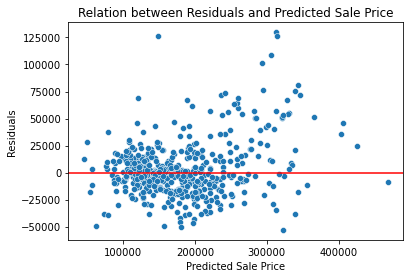

In [56]:
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Relation between Residuals and Predicted Sale Price')
plt.axhline(0,color='red')
sns.scatterplot(x=pd.Series(list(lasso_pred_inverse)).map(lambda x: x[0]).values,y=residuals);

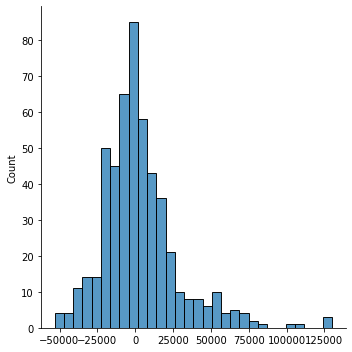

In [82]:
sns.displot(residuals);

<AxesSubplot:>

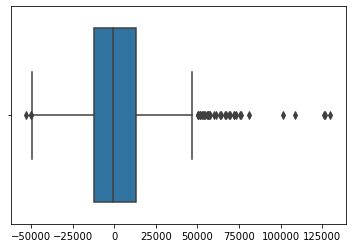

In [58]:
sns.boxplot(x=residuals)

In [59]:
lasso_coefs = pd.Series(lasso_cv.coef_,features_from_lasso)

<AxesSubplot:xlabel='Percentage Change in Sale Price', ylabel='Features'>

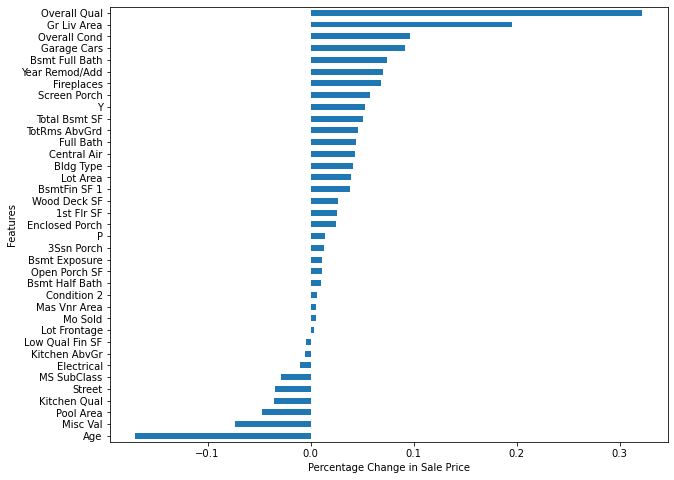

In [60]:
plt.figure(figsize=(10,8))
plt.xlabel('Percentage Change in Sale Price')
plt.ylabel('Features')
lasso_coefs[lasso_coefs != 0].sort_values().plot.barh()

In [61]:
lasso_cv.coef_

array([-0.02847071,  0.00314218,  0.03905773, -0.0345108 ,  0.0066997 ,
        0.04087042,  0.32211072,  0.09653577,  0.07003335,  0.00563795,
        0.01145022,  0.0380915 ,  0.05130049,  0.04299186, -0.01060626,
        0.02543089, -0.00478266,  0.19604962,  0.0745879 ,  0.00994903,
        0.04364775, -0.00586734, -0.03544559,  0.04587115,  0.06793881,
        0.09174675,  0.02697433,  0.01100387,  0.02486066,  0.01317625,
        0.05808779, -0.04736813, -0.07288732,  0.00558185,  0.01403915,
        0.05322029, -0.17036146])

**Transforming the coefficients**

The model's target variable is logarithm of the actual target variable. This was done to turn target variable distribution into a more Guassian like curve. The actual coefficients of the features can be deduced by taking the exponent of each coefficient. ! is subtracted form each column 


In [62]:
actual_coefs = (np.exp(lasso_coefs) - 1).sort_values(ascending=False)
actual_coefs

Overall Qual       0.380038
Gr Liv Area        0.216587
Overall Cond       0.101349
Garage Cars        0.096087
Bsmt Full Bath     0.077440
Year Remod/Add     0.072544
Fireplaces         0.070300
Screen Porch       0.059808
Y                  0.054662
Total Bsmt SF      0.052639
TotRms AbvGrd      0.046940
Full Bath          0.044614
Central Air        0.043929
Bldg Type          0.041717
Lot Area           0.039831
BsmtFin SF 1       0.038826
Wood Deck SF       0.027341
1st Flr SF         0.025757
Enclosed Porch     0.025172
P                  0.014138
3Ssn Porch         0.013263
Bsmt Exposure      0.011516
Open Porch SF      0.011065
Bsmt Half Bath     0.009999
Condition 2        0.006722
Mas Vnr Area       0.005654
Mo Sold            0.005597
Lot Frontage       0.003147
Low Qual Fin SF   -0.004771
Kitchen AbvGr     -0.005850
Electrical        -0.010550
MS SubClass       -0.028069
Street            -0.033922
Kitchen Qual      -0.034825
Pool Area         -0.046264
Misc Val          -0

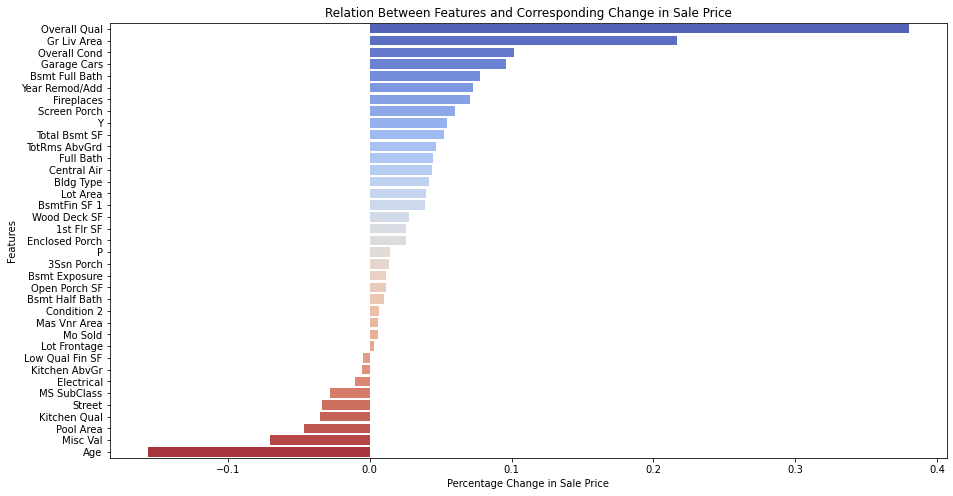

In [63]:
plt.figure(figsize=(15,8))
unscaled = pd.Series(actual_coefs,actual_coefs.index)
plt.xlabel('Percentage Change in Sale Price')
plt.ylabel('Features')
plt.title('Relation Between Features and Corresponding Change in Sale Price')
sns.barplot(x=actual_coefs.values,y=actual_coefs.index,ci=None,palette='coolwarm')
plt.savefig('../Images/Coefficients');

The above plotted graph shows the weightage every feature carries. After converting, the coefficients represent percentage increase or decrease. For example, with all other variables held constant, with every 1 year increase in the Age of the house, the Sale Price goes down by close to 0.175%.

## Comparison to Baseline Model 

In [64]:
dumb = DummyRegressor()

In [65]:
cross_val_score(dumb,X_train_sc,y_train_pt).mean()

-0.001423025406326417

In [66]:
dumb.fit(X_train_sc,y_train_pt)

DummyRegressor()

In [67]:
dumb.score(X_train_sc,y_train_pt), dumb.score(X_test_sc,y_test_pt)

(0.0, -0.00022989736589007492)

As seen above, the model has performed better than the Baseline Model. The train and test scores are in fact comparison of model prediction to baseline model prediction. If the model had performed worse than Baseline model, the scores would have been negative. 

## Kaggle Prediction

The model built using train data is being used to test it on the Kaggel test data. 

In order to predict Kaggle test data, entire train data is being used to train the model and predict 'SalePrice' from test data. 

In [68]:
model_lasso = LassoCV(alphas = l_alphas)

In [69]:
X_train = df_train[features_from_lasso]
y_train = df_train['SalePrice']
X_test = test[features_from_lasso]

In [70]:
ss = StandardScaler()

In [71]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [72]:
pt = PowerTransformer()
y_train_pt = pt.fit_transform(y_train.to_frame())

In [73]:
model_lasso.fit(X_train_sc,y_train_pt)

/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [74]:
cross_val_score(model_lasso, X_train_sc,y_train_pt).mean()

/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/ankitapatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

0.8504705208402787

The cross_val_score indicates that 85% of the variance in the target variable, Sale Price, can be explained by the model variables. 

In [75]:
kag_pred = lasso_cv.predict(X_test_sc)

In [76]:
kag_pred_inverse =pt.inverse_transform(kag_pred.reshape(-1,1))

In [77]:
kag_subm = pd.DataFrame(kag_pred_inverse,index=test['Id'],columns=['SalePrice'])
kag_subm

,SalePrice
Id,
2658,137943.694223
2718,154568.710372
2414,222930.797561
1989,110343.091504
625,183005.159648
...,...
1662,196141.562393
1234,210463.987748
1373,123839.361877


In [78]:
kag_subm.to_csv('../datasets/kaggle_submission_final.csv')

The Kaggle Score for this model came up to be 27281.91494. This score is the Root Mean Square Error.

## Conclusion

After cleaning the data, understanding correlation within different columns and with Sale Price, features that affect Sale Price of the house were determined. Amomgst these features were numerical features and ordinal & nominal features, turned in numerical features either using one hot encoding, or using exploratory data analysis. 

All these features were used to overfit the model, and regularize the model using the Lasso Regression. Based on results from initial lasso regression, features were selected and using these features, an improved lasso model modeled and compared to linear regression and ridge regression models. All the model evaluations were performed using train data, by splitting the data into train & test datasets and testing the models performance based on R2 scores and cross_val_scores. Amongst all the models, Lasso Regression model seemed to be the best fitting model for the datatset. The model exhibited .85 cross_val_score which means 85% of variance in the Sale PRice can be explained by the model. The model's performance was performed better than the Baseline model. 

Based on the model predictions, both structral and internal factors contribute to the Sale Price of the house. Overall Quality i.e. overall material and finish of the house has the highest positive impact on the price, followed by Total Living Area in sq ft of the house. These are followed by Garage Cars, which is essentially the garage space, and Overall Condition of the house. Remodeling a house brings up the price of teh house. Internal factors like number of baths, bedrooms, basement sq ft area have a strong positive effect on Sale Price. Finished Basement also has a positive effect but not as much as having a bigger basement. Having a fireplace certainly brings up the Sale Price of teh house. External factors that help increase the price of the house are Paved Driveway, Screen Porch, Wooden Deck and an Enclosed Porch. 

A strong deterring factor, and also an obvious one, to the Sale Price is Age of the house, number of years between the Year Built and the Year Sold. Value of Miscellaneous Features of the House are also a deterring factor tpo Sale Price. Pool area is a negative factor for Sale Price. This maybe because of the time and resources involved in maintaining it. An excellent kitchen is not so much a positive factor on the Sale Price as a typical/average quality is a negative factor. Gravel Street is not a positive choice. When it comes to Electrcail Systems of the House, most of the houses have Mixed wiring, which means there are some old and some new wires. This also contributes negatively towards the price of the house. 

## Recommendations

The model built to predict Sale Price still has room for improvement. More features and their correlation can be studied, and additional feature engineering can be included in the model. Missing data has been imuputed using mean, median or mode which are the basic ways of imputing data. Linear regression model can be used to understand predict the missing data. 

Overall Condition and Overall Quality of the house are strong positive factors for Sale Price. Although, they have a metric from 1 - 10, but they are also vague. It would be worth looking into these metrics and identifying factors that contribute to bring these metrics up. 

A way of increasing Sale Price on an old house is Remodeling. With more information on remodeling time and cost required, a better prediction can be made on how to reduce price loss on old homes. 